In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
%matplotlib inline
from sklearn.decomposition import PCA
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from pandas.plotting import scatter_matrix    
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import sys
from sklearn.neighbors import KNeighborsClassifier 
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
print('Done!')

Done!


In [2]:
def split_data_regression(X,Y):
    # Split the input and target data into test and train, with 75% of the data going to training, and 25% of the data going to testing
    X_tr, X_va, Y_tr, Y_va = train_test_split(X,Y.values.ravel(),test_size=0.25)

    # Print the shape of the split data
    print ('training set == ',np.shape(X_tr),np.shape(Y_tr),',, validation set == ', np.shape(X_va),np.shape(Y_va))
    
    # Normalize the data, as was done in Q2
    scaler_S= StandardScaler().fit(X_tr)  # line #2
    X_tr_Norm= scaler_S.transform(X_tr) # line # 3
    X_va_Norm= scaler_S.transform(X_va)  # Line #4
    
    n_column = 2

    # Plot a figure of the normalized training and validation set to ensure they represent the same distribution and spread
    
    fig = plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    plt.hist(X_tr_Norm[:,n_column])
    plt.title('Training set')
    plt.ylabel('N')
    plt.xlabel("X"+str(n_column))

    plt.subplot(1, 2, 2)
    plt.hist(X_va_Norm[:,n_column])
    plt.title('Validation set')
    plt.ylabel('N')
    plt.xlabel("X"+str(n_column))
    
    return X_tr_Norm, X_va_Norm, Y_tr, Y_va

(9982, 23)
564
Index(['10-100Hz', '100-1000Hz', '1-10kHz', '10-24kHz', '250Hz', '50-1000Hz',
       'DewPt', 'RelHum', 'WindDir', 'WindSp', 'Pressure', 'Ice6km2',
       'Ice19km2', 'Ice31km2', 'Ice106km2'],
      dtype='object')
Index(['Temperature'], dtype='object')
training set ==  (7231, 15) (7231,) ,, validation set ==  (2411, 15) (2411,)


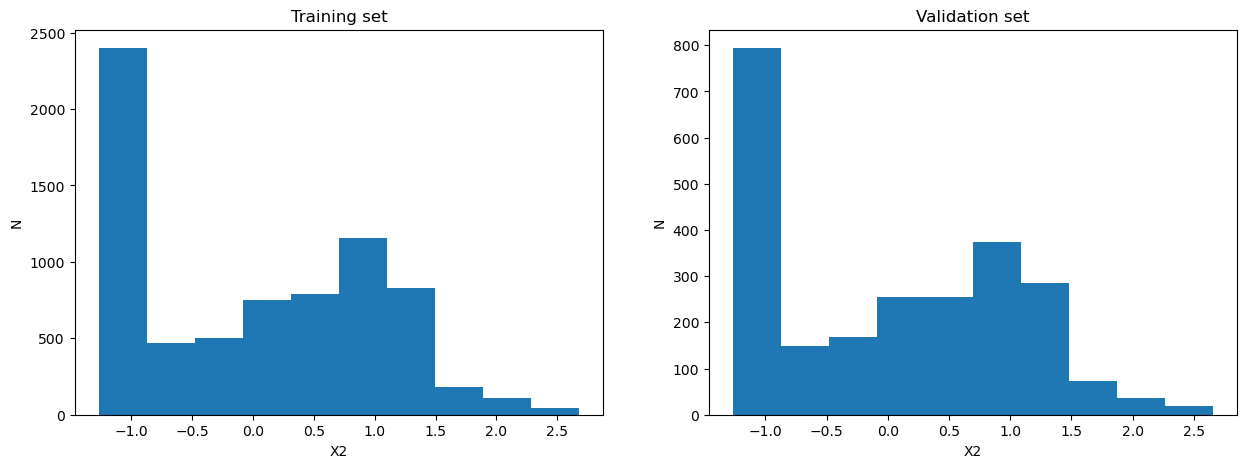

In [3]:
df_SH = pd.read_excel('Ambient Sound Data Sachs Harbour 2015-2016.xlsx')
print(df_SH.shape)

# Count the existing nans
nan_count = df_SH.isna().sum().sum()
print(nan_count)

# Drop non necessary columns 
df_SH = df_SH.drop(['Deployment', 'Year', 'Month', 'Day', 'Hour', 'DateTime', 'Ice'], axis=1)

# Double check there are no nans 
df_SH = df_SH.dropna(axis=0)

# Set temperature as the target variable
var = ['Temperature']

# Drop temperature out of the weather data, and set it as X
X = df_SH.loc[:,df_SH.columns.drop(var)]
print(X.columns)

# Set the target (Y) to be temperature
Y = df_SH[var].copy()
print(Y.columns)

# Call the split data function
X_tr_Norm, X_va_Norm, Y_tr, Y_va = split_data_regression(X,Y)

## Regression

In [4]:
#clf = MLPClassifier(solver='adam', alpha=1e-5,
#                    hidden_layer_sizes=(100,50), max_iter=1,
#                   early_stopping=False, validation_fraction=0.1 )

# ANN_reg_pipeline = Pipeline([('STD', StandardScaler()),('ANNreg', MLPRegressor())])
ANN_reg_pipeline = Pipeline([('ANNreg', MLPRegressor())])

params = [{'ANNreg__alpha':[1, .1, .01, .001,.0001],'ANNreg__solver': ['adam'], 'ANNreg__hidden_layer_sizes':[(20,20)]}]

gs_ann_reg = GridSearchCV(ANN_reg_pipeline,
                      param_grid=params,
                      scoring='neg_root_mean_squared_error',
                      cv=5)
#,'ANNreg__solver': 'lbfgs', 'ANNreg__hidden_layer_sizes':(20,20)
gs_ann_reg.fit(X_tr_Norm, Y_tr)

gs_ann_reg.best_params_

C:\Users\Karlee\miniconda3\envs\phys555\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\Karlee\miniconda3\envs\phys555\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\Karlee\miniconda3\envs\phys555\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\Karlee\miniconda3\envs\phys555\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceW

{'ANNreg__alpha': 0.0001,
 'ANNreg__hidden_layer_sizes': (20, 20),
 'ANNreg__solver': 'adam'}

## Classification Dataset

In [5]:
covtype = pd.read_csv('covtype.csv')
print(covtype.shape)
print(covtype.columns)

# "class" column as numpy array.
y = covtype["Cover_Type"].values
print(type(y))

# All data except "class" column.
x = covtype.drop(["Cover_Type"], axis=1).values
print(x.shape)

ohe = OneHotEncoder(sparse=False)
tar= np.reshape(y,(-1,1))
tar = ohe.fit_transform(tar)

# Split data for train and test.
X_tr, X_va, Y_tr, Y_va = train_test_split(x, tar, test_size=0.25)

print ('training set == ',np.shape(X_tr),np.shape(Y_tr),',, validation set == ', np.shape(X_va),np.shape(Y_va))
    
scaler_S= StandardScaler().fit(X_tr)  # line #2
X_tr_Norm= scaler_S.transform(X_tr) # line # 3
X_va_Norm= scaler_S.transform(X_va)  

(581012, 55)
Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39',

In [ ]:
# set up the pipeline
knn_pipeline = Pipeline([('KNN', KNeighborsClassifier())])

# choose the parameters that you would like to optimize:

params = [{'KNN__n_neighbors': [9,11,13,15,30,50,100],
         'KNN__p': [1, 2],
          }]
# # use GridSearchCV and the right meteric for classification or regression
gs_knn = GridSearchCV(knn_pipeline,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)
# run pipleline and fit the model
gs_knn.fit(X_tr_Norm, Y_tr)

#The best parameters of the optimization
gs_knn.best_params_

In [ ]:
knn_pipeline = Pipeline([('PCA', PCA()),
                         ('KNN', KNeighborsClassifier() )])

params = [{'PCA__n_components':[.7, .9, .999], 'KNN__n_neighbors': [15,30,50,100],
         'KNN__p': [1, 2],
          }]

gs_knn = GridSearchCV(knn_pipeline,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)

gs_knn.fit(X_tr_Norm, Y_tr)

gs_knn.best_params_

In [ ]:
# reg = MLPRegressor(hidden_layer_sizes=(100,50,), max_iter=50000, 
#                        activation='relu',solver='adam',tol=.00000001,alpha=.00007,early_stopping=True, 
#                        validation_fraction=0.1, learning_rate= 'constant',learning_rate_init=.001)

ANN_cls_pipeline = Pipeline([('ANNcls', MLPClassifier())])

params = [{'ANNcls__solver':['adam','sgd','lbfgs']}]

gs_ann_cls = GridSearchCV(ANN_cls_pipeline,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)

gs_ann_cls.fit(X_tr_Norm, Y_tr)

gs_ann_cls.best_params_

# Use ANN regression and find the best alpha and solver
# Do the same with ANN classification
# Do classification with KNN and finf the best K and P
# Do the same with KNN regession
